# Theoretical SERs for Popular modulations 

## BPSK, QPSK, 16-QAM

In [1]:
# import packages 
import numpy as np
import matplotlib.pyplot as plt 
from util.theoretic import *
from core.core import *
from modulation.qam import QAM

### Theoretic Computation

In [2]:
# Theoretical SERS and Monte-Carlo for Rayleigh channel

snrs_db = np.linspace(0, 15, 16, dtype=np.int32) 
snrs_db = snrs_db.reshape(-1, 1)
snrs = 10 ** (snrs_db/10)

# number of monte-carlo samples
N = 10000

# Generate Rayleigh fading coefficient samples
h = (1/np.sqrt(2)) * (np.random.randn(N, 1) + 1j * np.random.randn(N, 1))

# compute monte-carlo snrs for each snr by broadcasting 
snr_mc = snrs * (np.abs(h)**2).T 

# given monte-carlo snrs Theory and Monte-Carlo SERS
ser_rayleigh_theory = []
ser_rayleigh_qpsk = []
ser_rayleigh_qam = []
ser_awgn_theory = []
ser_awgn_qpsk = []
ser_awgn_qam = []

for i, snr in enumerate(snr_mc):
    ser_rayleigh_theory.append(compute_ser(qfunc(np.sqrt(snr))))
    ser_rayleigh_qpsk.append(compute_ser(qfunc(np.sqrt(snr)), type='qpsk'))
    ser_rayleigh_qam.append(compute_ser(qfunc(np.sqrt(snr), type='16-qam'), type='16-qam'))

    ser_awgn_theory.append(compute_ser(qfunc(np.sqrt(snrs[i]))))
    ser_awgn_qpsk.append(compute_ser(qfunc(np.sqrt(snrs[i])), type='qpsk'))
    ser_awgn_qam.append(compute_ser(qfunc(np.sqrt(snrs[i]), type='16-qam'), type='16-qam'))


### Simulation

In [3]:
# Initialize 16-QAM modulator
M = 16
k = np.log2(M)
modem = QAM(M=M)

# random generation of bits 
num_bits = 400000
bits = np.int32(np.random.rand(num_bits)>0.5)

# modulation 
num_symbols = np.int32(num_bits / k)
symbols = modem.modulate(bits)

# snr_dbs 
snrs_db = np.linspace(0, 15, 16, dtype=np.int32) 
snrs = 10 ** (snrs_db/20)

SERS_awgn = []
SERS_rayleigh = []
# AWGN channel 

for snr in snrs:
    z = 1/np.sqrt(2) * (np.random.randn(num_symbols) + 1j * np.random.randn(num_symbols))
    h = 1/np.sqrt(2) * (np.random.randn(num_symbols) + 1j * np.random.randn(num_symbols))
    
    # AWGN simulation 
    y_awgn = symbols + (1/snr) * z 
    x_hat_awgn = modem.demodulate(y_awgn) 
    s_hat_awgn = modem.s_hat / modem.avg_power
    SERS_awgn.append(np.average(1 - np.isclose(s_hat_awgn, symbols)))


    # Rayleigh simulation
    y_rayleigh = h * symbols + (1/(snr)) * z 
    y_rayleigh /= h 
    x_hat_rayleigh = modem.demodulate(y_rayleigh) 
    s_hat_rayleigh = modem.s_hat / modem.avg_power 
    SERS_rayleigh.append(np.average(1 - np.isclose(s_hat_rayleigh, symbols)))



## All in one Graph
### Rayleigh fading channel and AWGN channel 

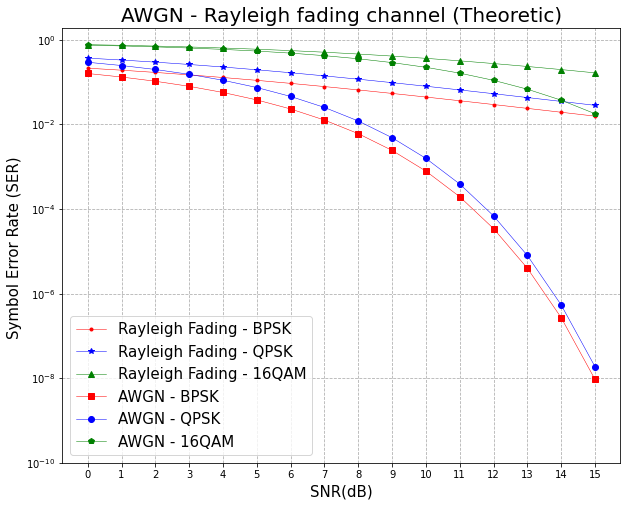

In [4]:
# all in one plot 
plt.figure(figsize=(10, 8))
plt.semilogy(ser_rayleigh_theory, '.-r', linewidth=.5, label='Rayleigh Fading - BPSK')
plt.semilogy(ser_rayleigh_qpsk, '*-b', linewidth=.5, label='Rayleigh Fading - QPSK')
plt.semilogy(ser_rayleigh_qam, '^-g', linewidth=.5, label="Rayleigh Fading - 16QAM")

plt.semilogy(ser_awgn_theory, 's-r', linewidth=.5, label='AWGN - BPSK')
plt.semilogy(ser_awgn_qpsk, 'o-b',linewidth=.5, label='AWGN - QPSK')
plt.semilogy(ser_awgn_qam, 'p-g', linewidth=.5, label='AWGN - 16QAM')

plt.xticks(np.arange(0, 16, dtype=np.int32))
plt.yticks([1e0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])
plt.title("AWGN - Rayleigh fading channel (Theoretic)", fontsize=20)
plt.xlabel("SNR(dB)", fontsize=15)
plt.ylabel("Symbol Error Rate (SER) ", fontsize=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15)
plt.show()

## AWGN channel 

### BPSK, QPSK, 16-QAM

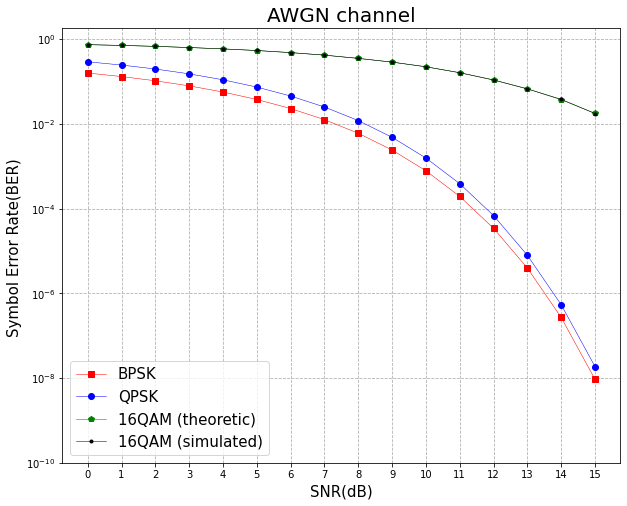

In [5]:
# AWGN channel plot
plt.figure(figsize=(10, 8))
plt.semilogy(ser_awgn_theory, 's-r', linewidth=.5, label='BPSK')
plt.semilogy(ser_awgn_qpsk, 'o-b',linewidth=.5, label='QPSK')
plt.semilogy(ser_awgn_qam, 'p-g', linewidth=.5, label='16QAM (theoretic)')
plt.semilogy(SERS_awgn, '.-k', linewidth=.5, label='16QAM (simulated)')
plt.xticks(np.arange(0, 16, dtype=np.int32))
plt.yticks([1e0, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10])
plt.title("AWGN channel", fontsize=20)
plt.xlabel("SNR(dB)", fontsize=15)
plt.ylabel("Symbol Error Rate(BER) ", fontsize=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15)
plt.show()

## Rayleigh fading channel 

### BPSK, QPSK, 16-QAM 

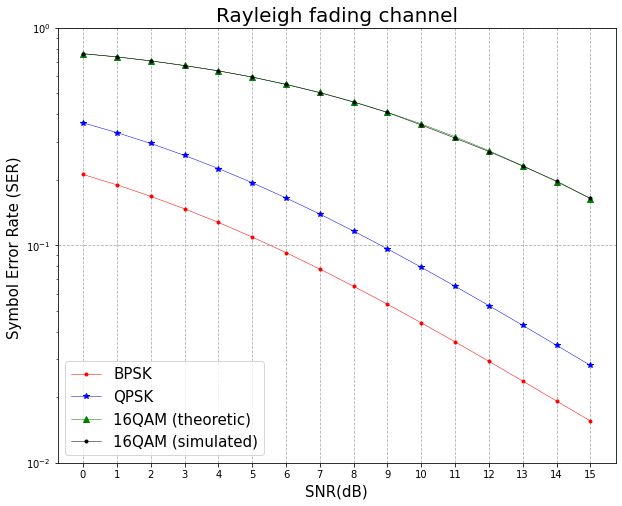

In [6]:

plt.figure(figsize=(10, 8))
plt.semilogy(ser_rayleigh_theory, '.-r', linewidth=.5, label='BPSK')
plt.semilogy(ser_rayleigh_qpsk, '*-b', linewidth=.5, label='QPSK')
plt.semilogy(ser_rayleigh_qam, '^-g', linewidth=.5, label="16QAM (theoretic)")
plt.semilogy(SERS_rayleigh, '.-k', linewidth=.5, label='16QAM (simulated)') 
plt.xticks(np.arange(0, 16, dtype=np.int32))
plt.yticks([1e0, 1e-1, 1e-2, ])
plt.title("Rayleigh fading channel", fontsize=20)
plt.xlabel("SNR(dB)", fontsize=15)
plt.ylabel("Symbol Error Rate (SER) ", fontsize=15)
plt.grid(linestyle='--')
plt.legend(fontsize=15)
plt.show()